# Traffic Jam on I-94

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


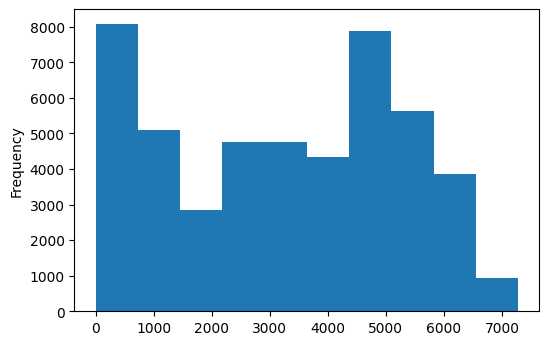

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
i_94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


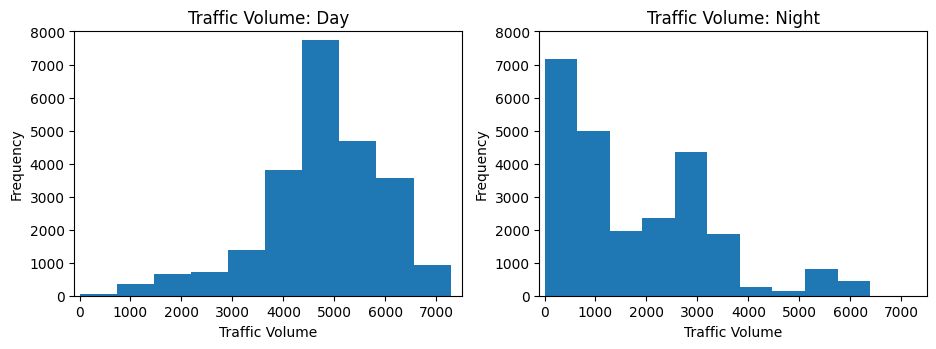

In [7]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low

As a result, we should be focusing on day traffic only

In [8]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

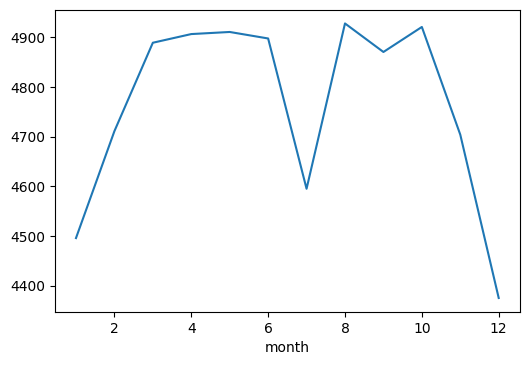

In [10]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

In the month of July there seem to be not much traffic.

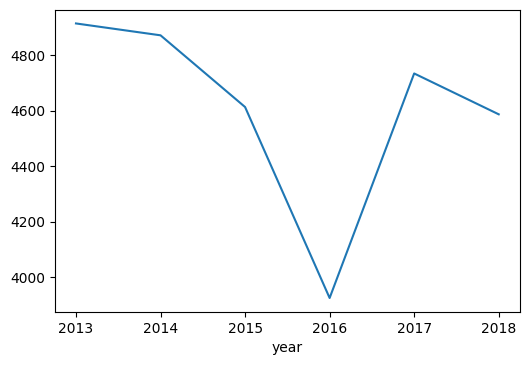

In [11]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Year 2016 is where least traffic on I 94

                 temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
dayofweek                                                               
0          282.262755  2.923823  0.000017   57.508053     4893.551286   
1          282.301770  0.129172  0.000194   52.333234     5189.004782   
2          282.198316  0.068099  0.001091   53.662119     5284.454282   
3          282.279115  0.172436  0.000148   53.993191     5311.303730   
4          282.181216  0.092828  0.000225   51.412200     5291.600829   
5          282.300646  0.107596  0.000094   50.446376     3927.249558   
6          282.280340  0.133170  0.000000   52.288699     3436.541789   

              month         year  
dayofweek                         
0          6.401243  2015.524442  
1          6.458757  2015.582487  
2          6.619158  2015.491147  
3          6.501184  2015.484902  
4          6.575067  2015.514954  
5          6.498821  2015.527991  
6          6.604179  2015.444379  


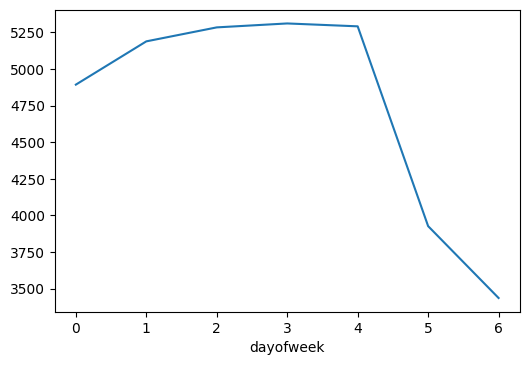

In [12]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
print(by_dayofweek)
by_dayofweek['traffic_volume'].plot.line()
plt.show()

In the weekends, traffic is significantly less than work days.

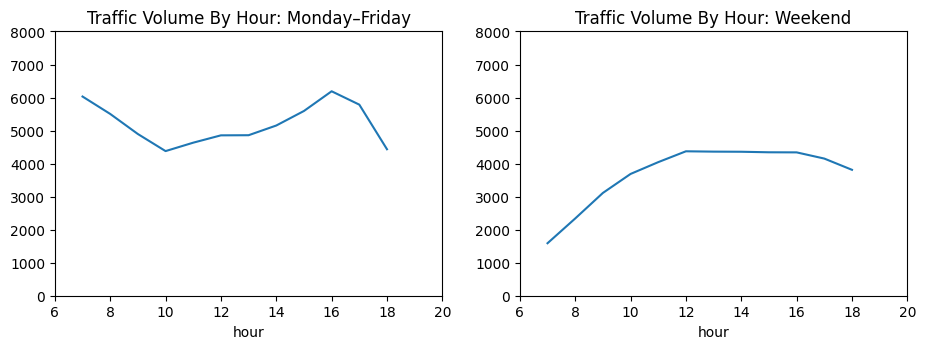

In [14]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(0,8000)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(0,8000)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

Business day will have more traffic than weekends. Average Traffic for business day is around 5,000, while weekends only have 3,000

In Summary:
    1. I-94 will have more traffic in spring and fall
    2. year 2016 is when least traffic exists on I-94
    3. Business days make I-94 busier than weekends.
    4. Rush hour for business day happens at 7am and 4pm while peak for weekend happens from 12pm to 16pm

In [19]:
i_94.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

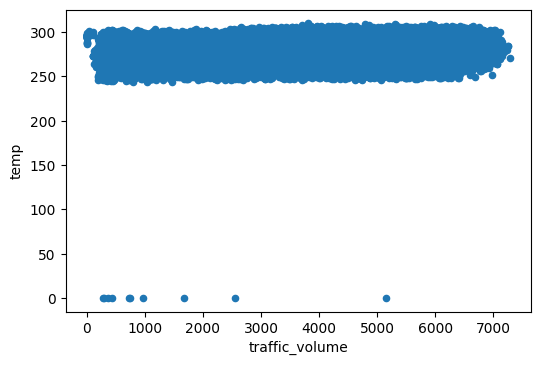

In [20]:
i_94.plot.scatter('traffic_volume','temp')

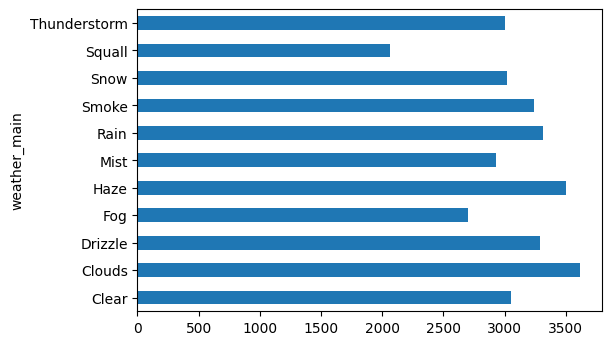

In [21]:
by_weather_main = i_94.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

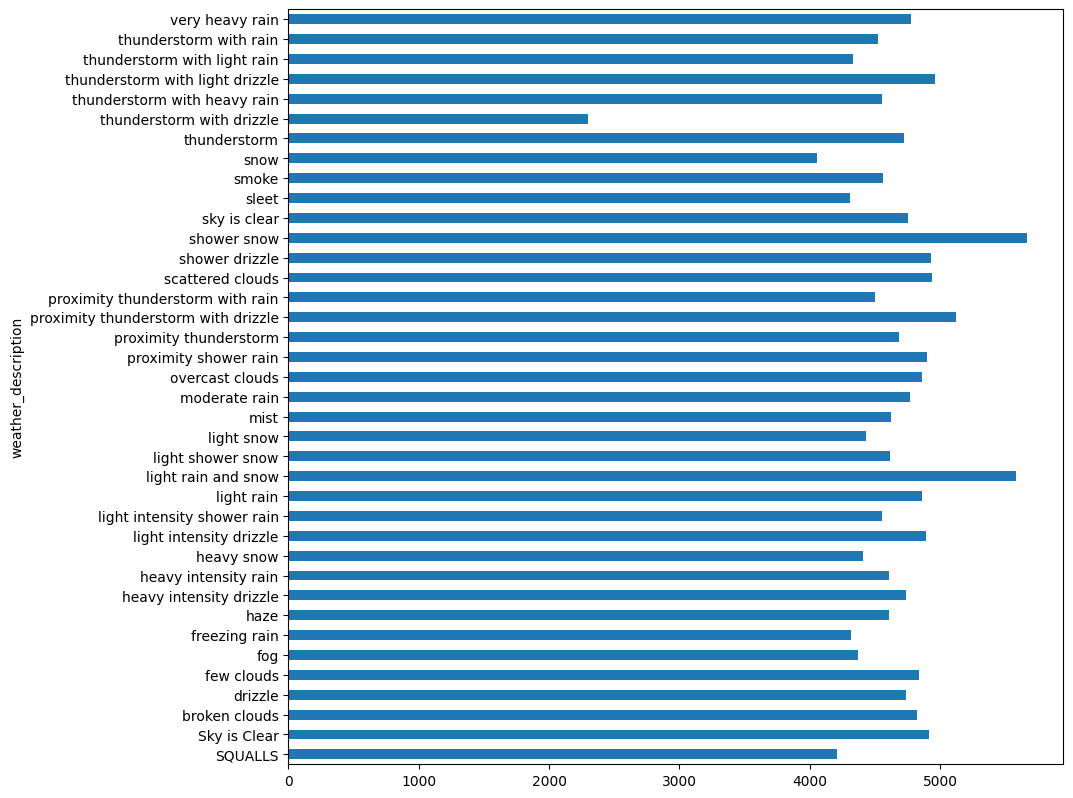

In [25]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize = (10,10))
plt.show()

Proximity thunderstorm with drizzle, shower snow, and light rain and snow is when I-94 has more than 5,000 traffic volume. It is confusing to me that these weather has more traffic volume than 'sky is clear